In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import regex as re
%matplotlib inline 
sns.set(color_codes=True)

<h3> Read Data</h3>
<ul>
<li>Reading the CSV file</li>
<li>Developers and genres are string in format <code>['xxx', 'yyy']</code>.</li>
<li>Split developers and genres string into series using regular expression <code>\s*', '\s*'</code>. <i>TBD: handle <code>"</code></i></li>
<li>List first few lines of data</li>
</ul>

In [3]:
df = pd.read_csv('metacritic-data.csv')
#df, df.columns = df[1:] , df.iloc[0]
df['developers']=df['developers'].str[2:-2].str.split(r"\s*', '\s*")
df['genres']=df['genres'].str[2:-2].str.split(r"\s*', '\s*")

df.head(6)

,Source.Name.2.1,meta_score,title,platform,release_date,user_score,link,esrb_rating,publisher,developers,genres,num_meta_review,num_user_review,game_img_url
0,3ds,NaN,Harold Reborn,3DS,5/13/2021,tbd,/game/3ds/harold-reborn,E,Luke Vincent,[Luke Vincent],"[Action, Platformer, 3D]",0.0,NaN,https://static.metacritic.com/images/products/...
1,3ds,NaN,Harold's Walk,3DS,12/28/2020,tbd,/game/3ds/harolds-walk,E,Luke Vincent,[Luke Vincent],"[Action, Platformer, 3D]",0.0,NaN,https://static.metacritic.com/images/products/...
2,3ds,NaN,The Queen TV-Game 2,3DS,11/26/2020,tbd,/game/3ds/the-queen-tv-game-2,M,Batafurai,[Butterfly],"[Action, Arcade]",0.0,NaN,https://static.metacritic.com/images/products/...
3,3ds,NaN,Maze Breaker V,3DS,10/22/2020,tbd,/game/3ds/maze-breaker-v,NaN,nuGAME,[nuGAME],"[Puzzle, General]",0.0,NaN,https://static.metacritic.com/images/products/...
4,3ds,NaN,snake3d,3DS,10/1/2020,tbd,/game/3ds/snake3d,NaN,IGOR GAFTON,[IGOR GAFTON],"[Puzzle, General]",0.0,NaN,https://static.metacritic.com/images/products/...
5,3ds,NaN,Atlantis-6,3DS,10/1/2020,tbd,/game/3ds/atlantis-6,NaN,IGOR GAFTON,[IGOR GAFTON],"[Action, Shooter, First-Person, Arcade]",0.0,NaN,https://static.metacritic.com/images/products/...


In [4]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN).apply(pd.to_numeric)

In [5]:
df['release_date'] = df['release_date'].apply(pd.to_datetime)

In [6]:
dfPlat = pd.read_csv('platform.csv')
dfPlat.head()
df = pd.merge(df, dfPlat, on='platform')

Checking the data type

In [7]:
print(df.dtypes)
print(df.shape)
print(df.count())

Source.Name.2.1            object
meta_score                float64
title                      object
platform                   object
release_date       datetime64[ns]
user_score                float64
link                       object
esrb_rating                object
publisher                  object
developers                 object
genres                     object
num_meta_review           float64
num_user_review           float64
game_img_url               object
company                    object
platform_type              object
dtype: object
(60871, 16)
Source.Name.2.1    60871
meta_score         22130
title              60871
platform           60871
release_date       60870
user_score         22001
link               60871
esrb_rating        35230
publisher          60724
developers         59490
genres             60864
num_meta_review    60865
num_user_review    22004
game_img_url       60867
company            60871
platform_type      60871
dtype: int64


Null values check

In [8]:
print(df.isnull().sum())

Source.Name.2.1        0
meta_score         38741
title                  0
platform               0
release_date           1
user_score         38870
link                   0
esrb_rating        25641
publisher            147
developers          1381
genres                 7
num_meta_review        6
num_user_review    38867
game_img_url           4
company                0
platform_type          0
dtype: int64


Outlier Detect (meta score)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36:

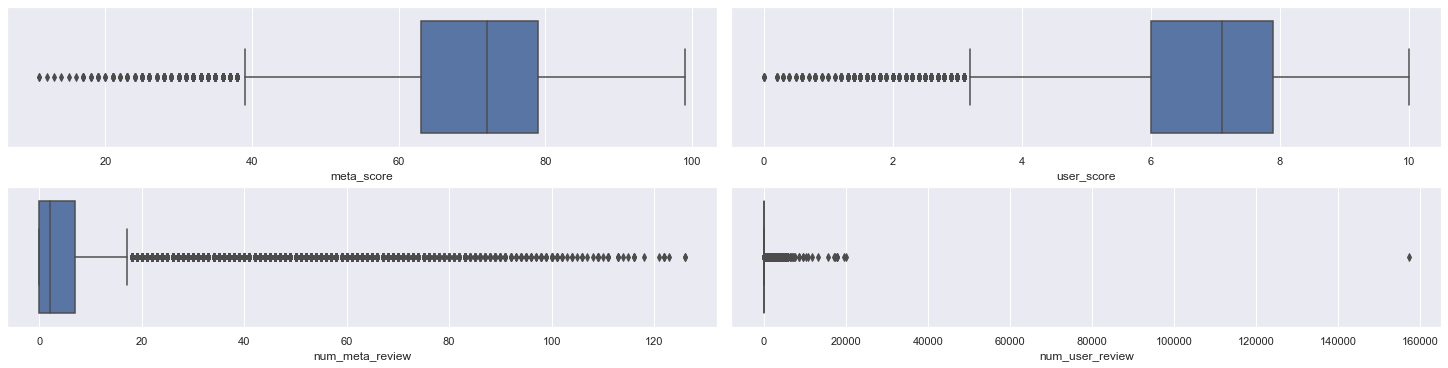

In [9]:
#sns.set(rc={'figure.figsize':(26,4)})
#sns.boxplot(x='meta_score', y='user_score', data=df)
#sns.boxplot(x=df['meta_score'])
#selected = df[["meta_score", "user_score", "num_meta_review", "num_user_review"]]
fig, axs = plt.subplots(2,2, constrained_layout=True, figsize=(20,5))

sns.boxplot(df['meta_score'], ax=axs[0,0])
sns.boxplot(df['user_score'], ax=axs[0,1])
sns.boxplot(df['num_meta_review'], ax=axs[1,0])
sns.boxplot(df['num_user_review'], ax=axs[1,1])
plt.show()


<h3>Histogram</h3>
Counting number of titles per key attributes

Text(0.5, 0, 'ESRB Rating')

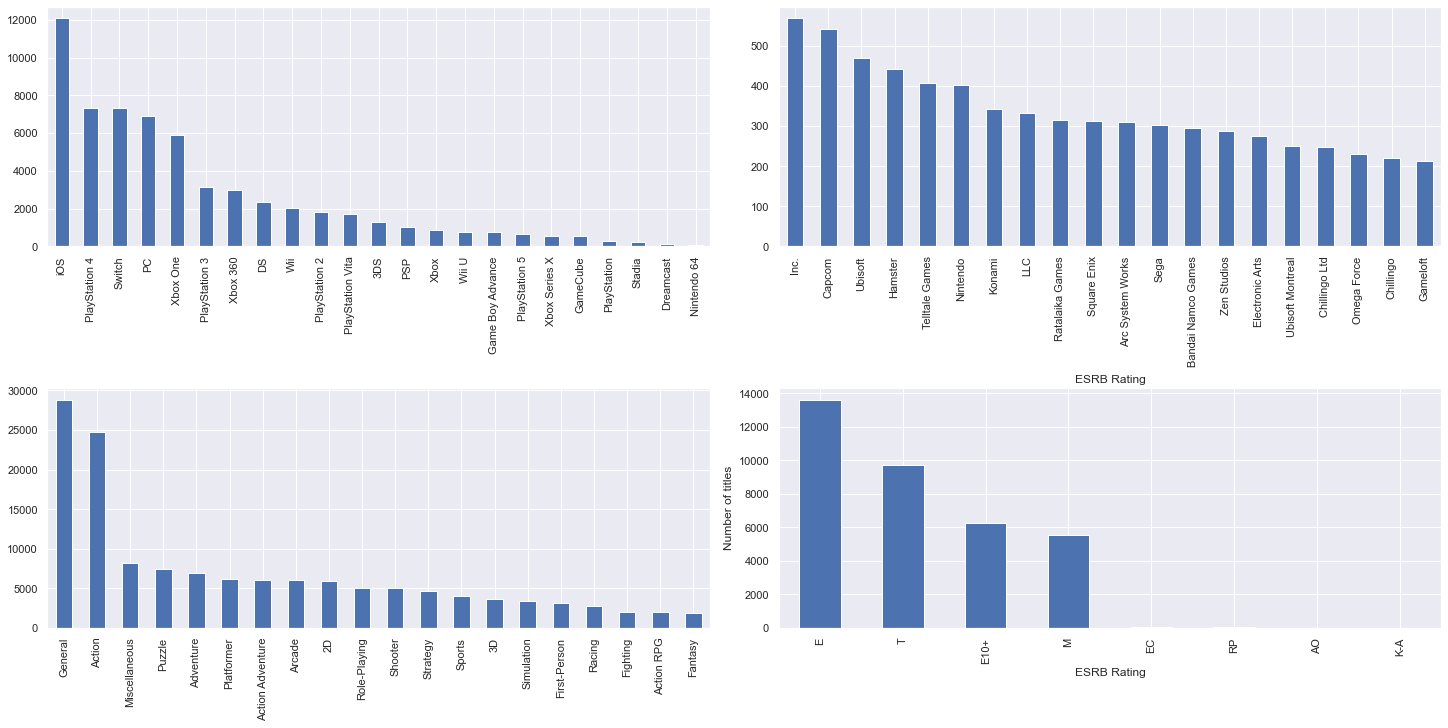

In [20]:
fig, axs = plt.subplots(2,2, constrained_layout=True, figsize=(20,10))

df.platform.value_counts().plot(kind="bar", ax=axs[0,0])
plt.title("Platform")
plt.ylabel("Number of titles")
plt.xlabel("Platform")

df.developers.explode().value_counts().nlargest(20).plot(kind="bar", ax=axs[0,1])
plt.title("Top 20 developers")
plt.ylabel("Number of titles")
plt.xlabel("Developer")

df.genres.explode().value_counts().nlargest(20).plot(kind="bar", ax=axs[1,0])
plt.title("Top 20 genres")
plt.ylabel("Number of titles")
plt.xlabel("Genres")

df.esrb_rating.value_counts().plot(kind="bar", ax=axs[1,1])
plt.title("ESRB Rating")
plt.ylabel("Number of titles")
plt.xlabel("ESRB Rating")


Heat Map
To visual and find out possible relationship among numeric columns

,meta_score,user_score,num_meta_review,num_user_review
meta_score,1.000000,0.499458,0.242786,0.085783
user_score,0.499458,1.000000,0.233131,0.024865
num_meta_review,0.242786,0.233131,1.000000,0.209115
num_user_review,0.085783,0.024865,0.209115,1.000000


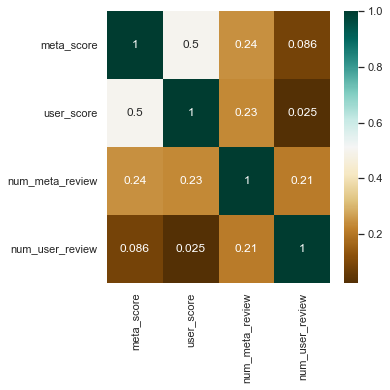

In [21]:
plt.figure(figsize=(5,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

Scatterplot

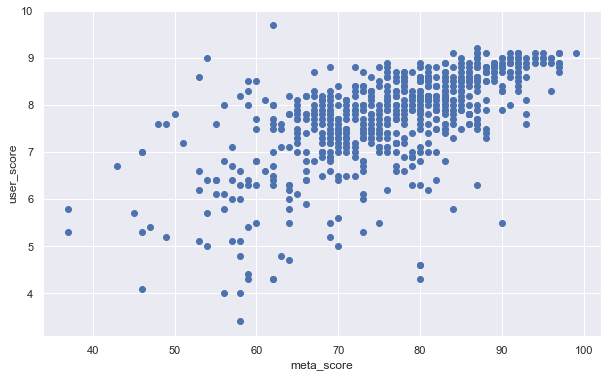

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['meta_score'], df['user_score'])
ax.set_xlabel('meta_score')
ax.set_ylabel('user_score')
plt.show()

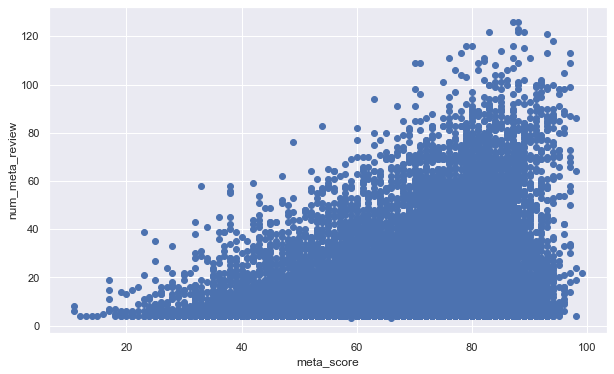

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['meta_score'], df['num_meta_review'])
ax.set_xlabel('meta_score')
ax.set_ylabel('num_meta_review')
plt.show()

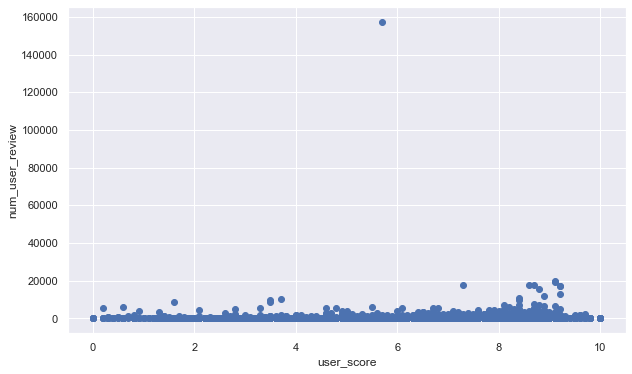

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['user_score'], df['num_user_review'])
ax.set_xlabel('user_score')
ax.set_ylabel('num_user_review')
plt.show()

7


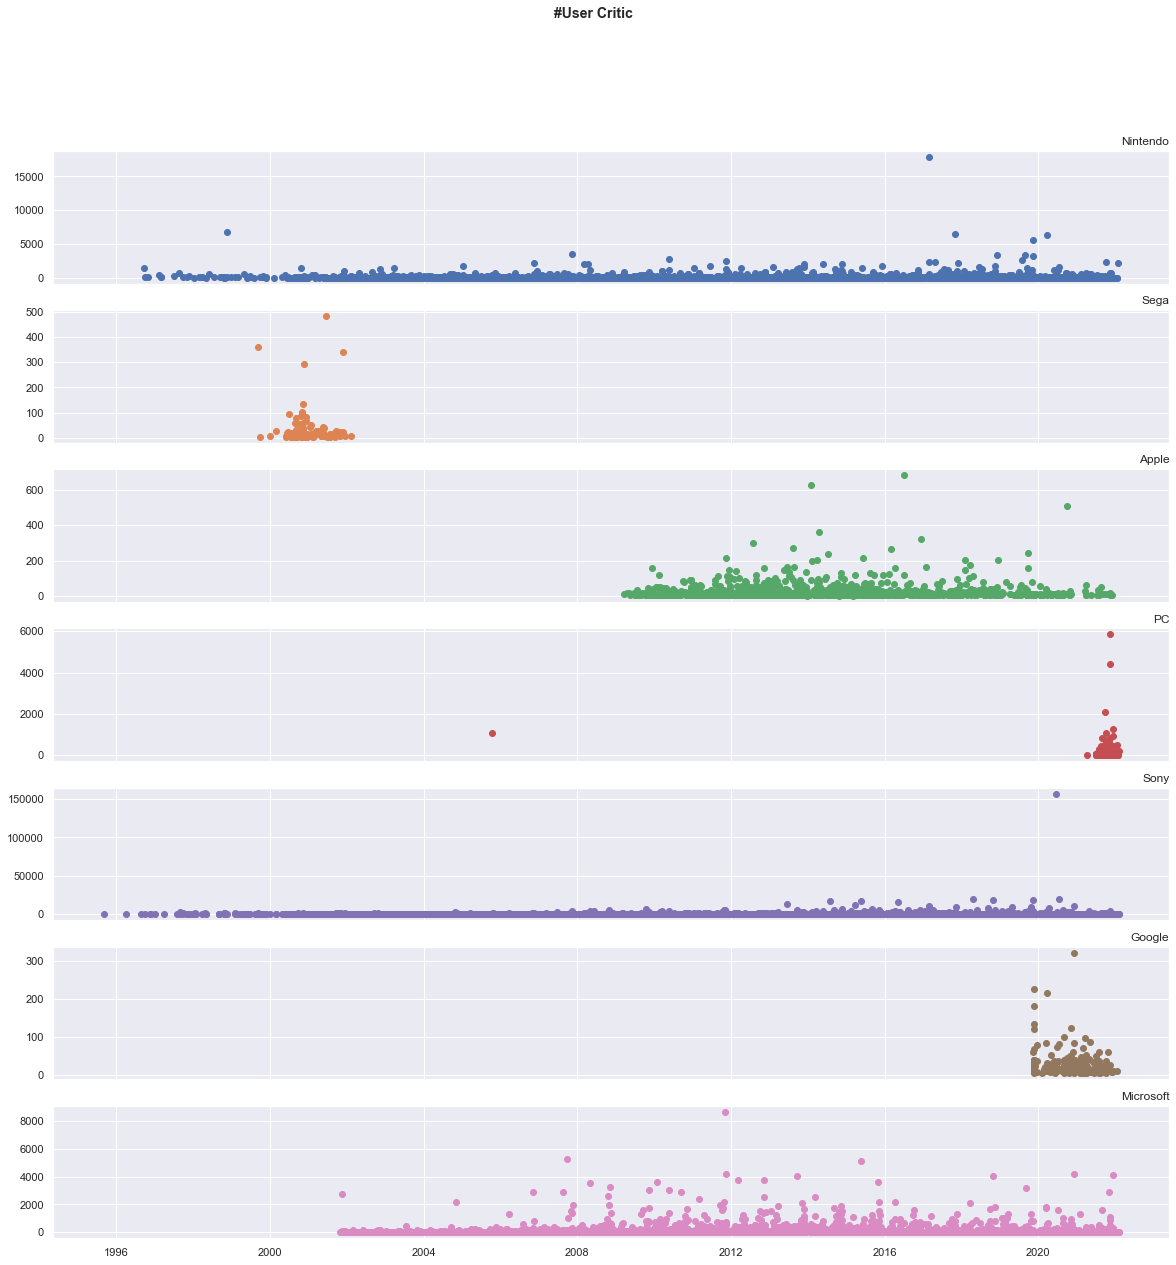

In [ ]:
company = df.company.unique()

#fig, axs =plt.subplots(company.size, figsize=(10,6), sharex='col', sharey='row', gridspec_kw={'hspace': 10, 'wspace': 10})
fig, axs =plt.subplots(company.size, figsize=(20,20), sharex=True)
fig.suptitle('#User Critic', fontsize=14, fontweight='bold')
colors = plt.rcParams["axes.prop_cycle"]()

#ax = fig.add_subplot(111)
#axs.set_xlabel('Release Date')
#axs.set_ylabel('#User Critic')
#ax.set_ylim([0, 25000])
#fig.subplots_adjust(top=0.85)


#platforms = pd.Series(['Switch', 'Playstation 4', 'Xbox One'])
#platforms = platforms['Switch', 'Playstation 4', 'Xbox One']
print(company.size)
#plt.subplots_adjust(hspace=0.000)
v = 0
for plat in company:
    dfp = df.loc[df.company == plat]
    c = next(colors)["color"]
    #axs[v] = plt.subplot(23,1,v)
    axs[v].plot_date(dfp.release_date, dfp.num_user_review, xdate=True, ydate=False, color=c)
    
    axs[v].set_title(plat, loc="right")
    v=v+1

#plt.legend(company)
#p = ax.plot_date(df.release_date, df.num_user_review, xdate=True, ydate=False, color='skyblue')


# produce a legend with the unique colors from the scatter
#legend1 = ax.legend(*p.legend_elements(),                    loc="upper", title="Classes")
#ax.add_artist(legend1)

plt.show()